<a href="https://colab.research.google.com/github/jason1078/CNN.co-edu/blob/main/CNN_Fashion_MNIST_%EC%9D%98%EB%A5%98_%ED%81%B4%EB%9E%98%EC%8A%A4_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 모듈 및 데이터 세트 가져오기
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) =\
fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

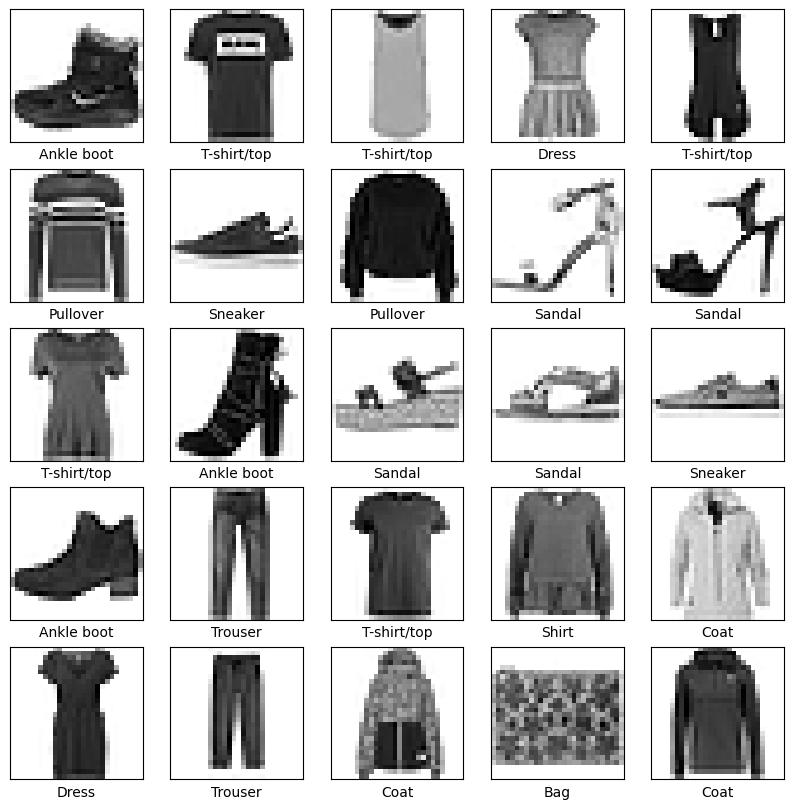

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5, 5, i+1, xticks = [], yticks = [])
 plt.imshow(train_images[i], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[i]])
plt.show()

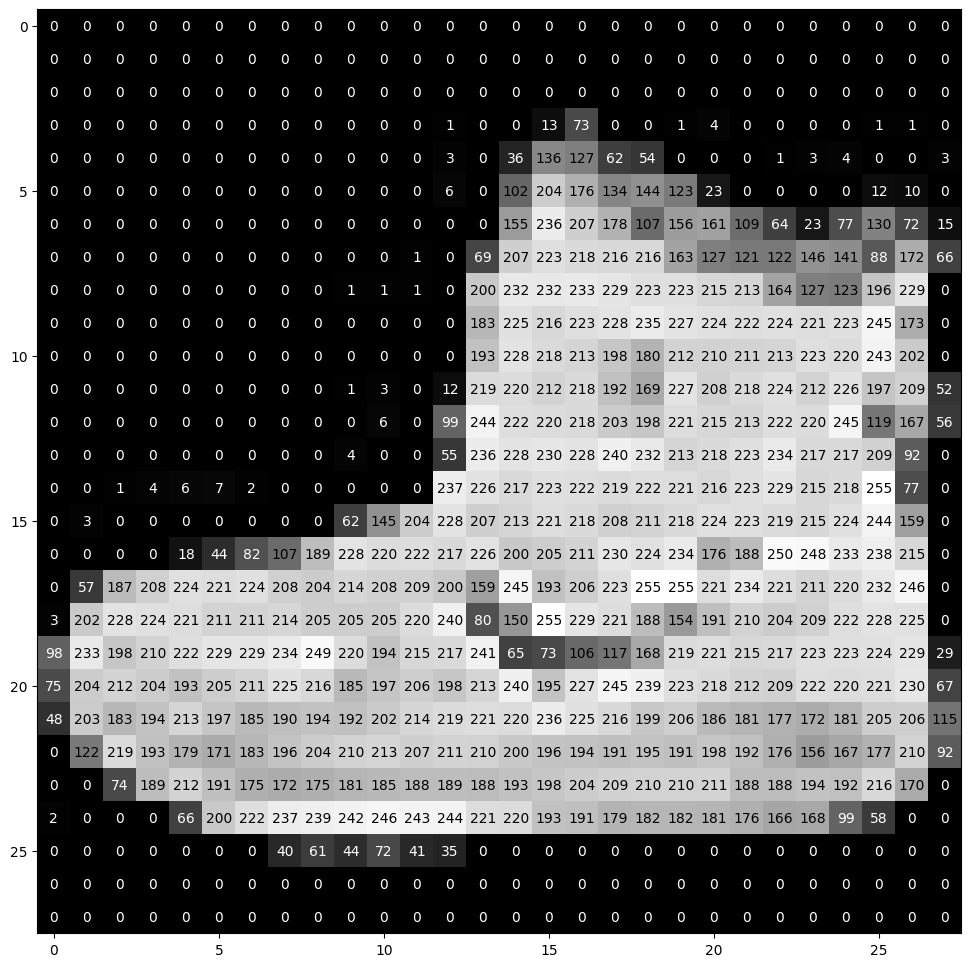

In [ ]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy = (y,x),
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        color='white' if img[x][y] < thresh else 'black')
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(train_images[0], ax)

In [ ]:
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(
train_images, train_labels, test_size=0.2, random_state=42)
print(train_images.shape, train_labels.shape)
print(val_images.shape, val_labels.shape)
print(test_images.shape, test_labels.shape)

(48000, 28, 28, 1) (48000,)
(12000, 28, 28, 1) (12000,)
(10000, 28, 28, 1) (10000,)


In [ ]:
model = Sequential()
# 신경망의 첫 번째 층은 input_shape 매개변수로
# 입력의 크기를 꼭 지정해 주어야 한다.
model.add(Conv2D(32, kernel_size=(3, 3), strides=1, padding='same',
activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# 2차원 배열(28x28 픽셀)의 이미지 포맷을
# 28x28 = 784 픽셀의 1차원 배열로 변환한다.
model.add(Flatten())
model.add(Dense(64, activation='relu'))
# 0개의 노드의 소프트맥스(softmax) 층으로 클래스 10개의 확률을 반환하고
# 반환된 값의 전체 합은 1이다.
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# 콜백 객체 생성
checkpoint_cb = ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = EarlyStopping(patience=2, restore_best_weights=True)

In [ ]:
history = model.fit(train_images, train_labels, batch_size=100, epochs=20,
 verbose=1, validation_data=(val_images, val_labels),
 callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
480/480 [==============================] - 86s 174ms/step - loss: 0.6058 - accuracy: 0.7820 - val_loss: 0.4206 - val_accuracy: 0.8438
Epoch 2/20
480/480 [==============================] - 81s 168ms/step - loss: 0.3614 - accuracy: 0.8694 - val_loss: 0.3388 - val_accuracy: 0.8764
Epoch 3/20
480/480 [==============================] - 79s 164ms/step - loss: 0.3010 - accuracy: 0.8895 - val_loss: 0.3056 - val_accuracy: 0.8867
Epoch 4/20
480/480 [==============================] - 80s 166ms/step - loss: 0.2723 - accuracy: 0.9000 - val_loss: 0.2789 - val_accuracy: 0.8977
Epoch 5/20
480/480 [==============================] - 79s 164ms/step - loss: 0.2493 - accuracy: 0.9095 - val_loss: 0.2738 - val_accuracy: 0.9022
Epoch 6/20
480/480 [==============================] - 79s 164ms/step - loss: 0.2250 - accuracy: 0.9171 - val_loss: 0.2602 - val_accuracy: 0.9062
Epoch 7/20
480/480 [==============================] - 78s 163ms/step - loss: 0.2107 - accuracy: 0.9227 - val_loss: 0.2455 - val_ac

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


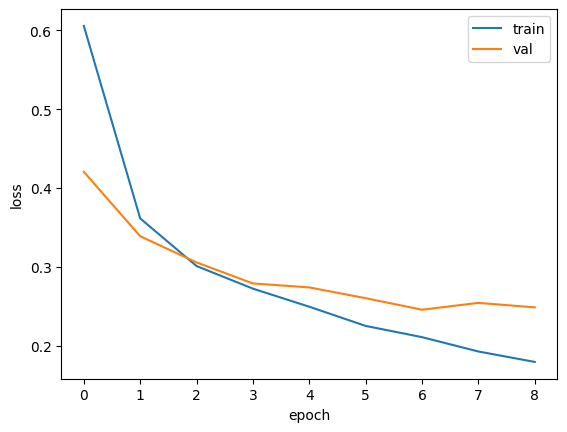

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
score = model.evaluate(val_images, val_labels, verbose=2)
accuracy = 100 * score[1]
print('Test accuracy: %.4f%%' % accuracy)

375/375 - 6s - loss: 0.2455 - accuracy: 0.9103 - 6s/epoch - 17ms/step
Test accuracy: 91.0333%


In [ ]:
score = model.evaluate(test_images, test_labels, verbose=2)
accuracy = 100 * score[1]
print('Test accuracy: %.4f%%' % accuracy)

313/313 - 5s - loss: 0.2605 - accuracy: 0.9071 - 5s/epoch - 17ms/step
Test accuracy: 90.7100%


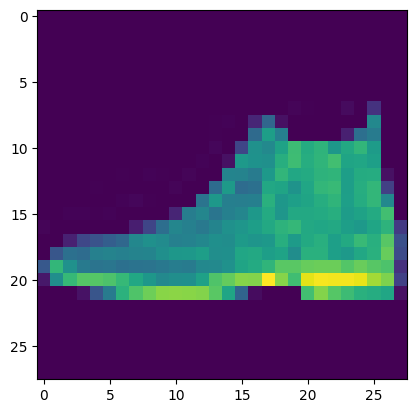

1/1 [==============================] - 0s 193ms/step
예측값:  9
정답: 9, Ankle boot


In [ ]:
# 한 장의 이미지에 대한 예측 그래프로 확인하기
plt.imshow(test_images[0].reshape(28, 28))
plt.show()
predictions = model.predict(test_images[0:1])
print('예측값: ', np.argmax(predictions[0]))
print(f'정답: {test_labels[0]}, {class_names[test_labels[0]]}')

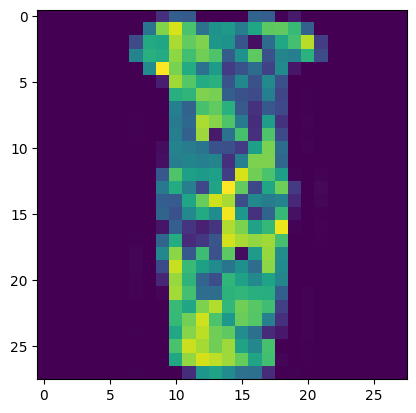

1/1 [==============================] - 0s 21ms/step
예측값:  3
정답: 3, Dress


In [ ]:
plt.imshow(test_images[100].reshape(28, 28))
plt.show()
predictions = model.predict(test_images[100:101])
print('예측값: ', np.argmax(predictions[0]))
print(f'정답: {test_labels[100]}, {class_names[test_labels[100]]}')